In [29]:
import pandas as pd
data=pd.read_csv('../data/Table1_update.csv')
data['age']=2019-data['Year_of_publication']+1
data['citation_per_year']=data['Number_of_Citations']/data['age']
data.loc[data.loc[:,'Aligner'] == 'HISAT2', 'citation_per_year'] = 95

data.loc[data.loc[:,'Indexing'] == 'hashing', 'Index'] = 'Hashing'
data.loc[data.loc[:,'Indexing'] == 'BWT-FM', 'Index'] = 'BWT-FM'
data.loc[data.loc[:,'Indexing'] == 'suffix array', 'Index'] = 'Other Suffix'
data.loc[data.loc[:,'Indexing'] == 'BWT-ST', 'Index'] = 'Other Suffix'
data.loc[data.loc[:,'Indexing'] == 'suffix tree', 'Index'] = 'Other Suffix'

data.loc[data.loc[:,'Pairwise_alignment'] == 'SW', 'Pairwise'] = 'Smith-Waterman'
data.loc[data.loc[:,'Pairwise_alignment'] == 'HD', 'Pairwise'] = 'Hamming Distance'
data.loc[data.loc[:,'Pairwise_alignment'] == 'NW', 'Pairwise'] = 'Needleman-Wunsch'
data.loc[data.loc[:,'Pairwise_alignment'] == 'Non-DP Heuristic', 'Pairwise'] = 'Non-DP Heuristic'
data.loc[data.loc[:,'Pairwise_alignment'] == 'SW & NW', 'Pairwise'] = 'Multiple Methods'
data.loc[data.loc[:,'Pairwise_alignment'] == 'SW & Semi-Global', 'Pairwise'] = 'Multiple Methods'
data.loc[data.loc[:,'Pairwise_alignment'] == 'Rabin-Karp Algorithm', 'Pairwise'] = 'Other DP'
data.loc[data.loc[:,'Pairwise_alignment'] == 'Landau-Vishkin', 'Pairwise'] = 'Other DP'
data.loc[data.loc[:,'Pairwise_alignment'] == 'Sparse DP', 'Pairwise'] = 'Other DP'
data.loc[data.loc[:,'Pairwise_alignment'] == 'Banded Myers Bit Vector', 'Pairwise'] = 'Other DP'
data.loc[data.loc[:,'Pairwise_alignment'] == 'Semi-Global', 'Pairwise'] = 'Other DP'
data.head()

,Unnamed: 0,Year_of_publication,Aligner,URL,Citation,chain_of_seeds,Read_Length,Max_Read_length_tested,Title,Number_of_Citations,...,chain_of_seeds.1,Application,email_first_author,email_last_author,Verified,Spliting_the_read,age,citation_per_year,Index,Pairwise
0,93,2019,deSALT,https://github.com/hitbc/deSALT,Liu et al. 2019,Y,Long,8000 bp,deSALT: fast and accurate long transcriptomic ...,0,...,Y,RNA-seq,NaN,NaN,NaN,NaN,1,0.0,Hashing,Smith-Waterman
1,91,2018,lordFAST,https://github.com/vpc-ccg/lordfast,Haghshenas et al. ‎2018,Y,Long,7kbp = 183.61million/25000,lordFAST: sensitive and Fast Alignment Search ...,2,...,Y,DNA,ehaghshe@sfu.ca,faraz.hach@ubc.ca,NaN,NaN,2,1.0,Hashing,Needleman-Wunsch
2,92,2018,Magic-BLAST,https://github.com/ncbi/magicblast,Boratyn et al. ‎2018,N,Long,10000-90000,"Magic-BLAST, an accurate DNA and RNA-seq align...",6,...,N,DNA/RNA-Seq,NaN,madden@ncbi.nlm.nih.gov,NaN,NaN,2,3.0,Hashing,Smith-Waterman
3,89,2018,minimap2,https://github.com/lh3/minimap2,Li et al. ‎2018,Y,Long,Long and Short,Minimap2: pairwise alignment for nucleotide se...,394,...,Y,DNA/RNA-Seq,me@liheng.org,NaN,NaN,NaN,2,197.0,Hashing,Needleman-Wunsch
4,94,2018,MUMmer4,https://github.com/mummer4/mummer,Marçais et al. 2018,Y,Long,Illumina and PacBio,MUMmer4: A fast and versatile genome alignment...,99,...,Y,DNA,gmarcais@cs.cmu.edu,alekseyz@ipst.umd.edu,NaN,NaN,2,49.5,Other Suffix,Smith-Waterman


In [30]:
rt = pd.read_csv('../data/compare.tools.runtime.hours.csv')
mem = pd.read_csv('../data/compare.tools.memory.csv')

In [47]:
data_cite = data.loc[:,['citation_per_year', 'Aligner', 'Application', 'Index', 'Pairwise']]
data_cite.loc[:,'aligner_lower'] = data_cite['Aligner'].str.lower()
rt.loc[:,'tools_lower'] = rt['Tools'].str.lower()
rtcite = pd.merge(rt, data_cite, left_on='tools_lower', right_on='aligner_lower', how='inner')
rtcite.loc[:,'average_runtime'] = rtcite.iloc[:,1:11].mean(axis=1)
rtcite.loc[:,'std_dev_rt'] = rtcite.iloc[:,1:11].std(axis=1)
rtcite.loc[3,'ERR162843'] = rtcite.loc[3,'average_runtime']
rtcite = rtcite.loc[rtcite.loc[:,'Application'] != 'RNA-Seq']
rtcite_new = pd.melt(rtcite, id_vars = ['Tools', 'citation_per_year', 'Application', 'Index', 'Pairwise'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'runtime')
rtcite_summ = rtcite.loc[:,['Tools', 'citation_per_year', 'average_runtime', 'std_dev_rt', 'Application', 'Index', 'Pairwise']]
rtcite_summ

,Tools,citation_per_year,average_runtime,std_dev_rt,Application,Index,Pairwise
0,Bowtie2,2010.125000,4.973138,2.040406,DNA,BWT-FM,Multiple Methods
1,Bowtie,1353.636364,6.102213,2.942134,DNA,BWT-FM,Hamming Distance
2,BWA,1831.181818,6.239311,2.106996,DNA,BWT-FM,Smith-Waterman
3,ERNE,2.250000,8.281991,3.378498,DNA,Hashing,Hamming Distance
4,gsnap,154.900000,20.924469,10.347573,DNA,Hashing,Non-DP Heuristic
5,hisat2,95.000000,1.158713,0.634037,DNA,BWT-FM,Non-DP Heuristic
6,last,62.777778,20.221401,7.627339,DNA,Other Suffix,Smith-Waterman
7,minimap2,197.000000,1.866426,0.694104,DNA/RNA-Seq,Hashing,Needleman-Wunsch
8,rmap,32.083333,12.950420,4.114427,DNA,Hashing,Hamming Distance
9,smalt,2.700000,32.163790,14.049867,DNA,Hashing,Smith-Waterman


In [48]:
mem.loc[:,'tools_lower'] = mem['Tools'].str.lower()
memcite = pd.merge(mem, data_cite, left_on='tools_lower', right_on='aligner_lower', how='inner')
memcite.loc[:,'average_memory'] = memcite.iloc[:,1:11].mean(axis=1)
memcite.loc[:,'std_dev_mem'] = memcite.iloc[:,1:11].std(axis=1)
memcite = memcite.loc[memcite.loc[:,'Application'] != 'RNA-Seq']
memcite_new = pd.melt(memcite, id_vars = ['Tools', 'citation_per_year', 'Application', 'Index', 'Pairwise'], 
        value_vars = ['ERR009309', 'ERR013127', 'ERR013138', 'ERR045708', 'ERR050158', 'ERR162843', 'ERR181410',
                     'ERR183377', 'SRR061640', 'SRR360549'], value_name = 'memory')
memcite_summ = memcite.loc[:,['Tools', 'citation_per_year', 'average_memory', 'std_dev_mem', 'Application', 'Index', 'Pairwise']]
memcite_summ

,Tools,citation_per_year,average_memory,std_dev_mem,Application,Index,Pairwise
0,Bowtie2,2010.125000,3.5799,0.000316,DNA,BWT-FM,Multiple Methods
1,Bowtie,1353.636364,3.1940,0.000000,DNA,BWT-FM,Hamming Distance
2,BWA,1831.181818,5.7110,0.499966,DNA,BWT-FM,Smith-Waterman
3,ERNE,2.250000,5.3951,0.419100,DNA,Hashing,Hamming Distance
4,gsnap,154.900000,28.8536,1.453301,DNA,Hashing,Non-DP Heuristic
5,hisat2,95.000000,4.6941,0.000316,DNA,BWT-FM,Non-DP Heuristic
6,last,62.777778,15.3589,0.002923,DNA,Other Suffix,Smith-Waterman
7,minimap2,197.000000,12.4488,0.193869,DNA/RNA-Seq,Hashing,Needleman-Wunsch
8,rmap,32.083333,9.5320,1.860403,DNA,Hashing,Hamming Distance
9,smalt,2.700000,3.6766,0.001075,DNA,Hashing,Smith-Waterman


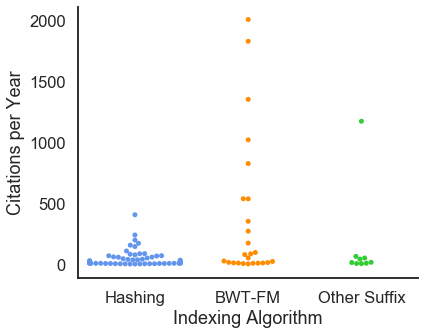

<Figure size 432x288 with 0 Axes>

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

clrs = ['cornflowerblue', 'darkorange', 'limegreen', 'crimson', 'plum', 'peru', 'aquamarine', 
        'pink', 'darkgrey', 'yellowgreen', 'lightcoral', 'gold']

order_by_year = ["rmap", "Bowtie", "BWA", "gsnap", "smalt", "last", "snap", "Bowtie2", "hisat2", "ERNE", "minimap2"]

sns.set_style('white')
sns.set_context('talk')



ax = sns.catplot(data=data_cite, x='Index', y='citation_per_year', aspect=1.25, 
                 order=['Hashing','BWT-FM','Other Suffix'], palette=clrs, kind='swarm')
ax.set(xlabel = 'Indexing Algorithm', ylabel = 'Citations per Year')
#ax.set_xticklabels(rotation=40, ha="right")
plt.show()

plt.savefig('../figures/Indexing_by_Citations.png')
plt.savefig('../figures/Indexing_by_Citations.pdf')

In [34]:
idx_group = data_cite.groupby('Indexing').sum().plot.bar()

KeyError: 'Indexing'

In [35]:
ax = sns.catplot(data=data_cite, x='Global_Positioning', y='citation_per_year', 
                 order=['Seed','Backward Search','Chain of Seeds'], palette=clrs)
ax.set(xlabel = 'Global Positioning', ylabel = 'Citations per Year')
ax.set_xticklabels(rotation=40, ha="right")
#plt.show()
plt.savefig('../figures/Global_by_Citations.png')
plt.savefig('../figures/Global_by_Citations.pdf')

ValueError: Could not interpret input 'Global_Positioning'

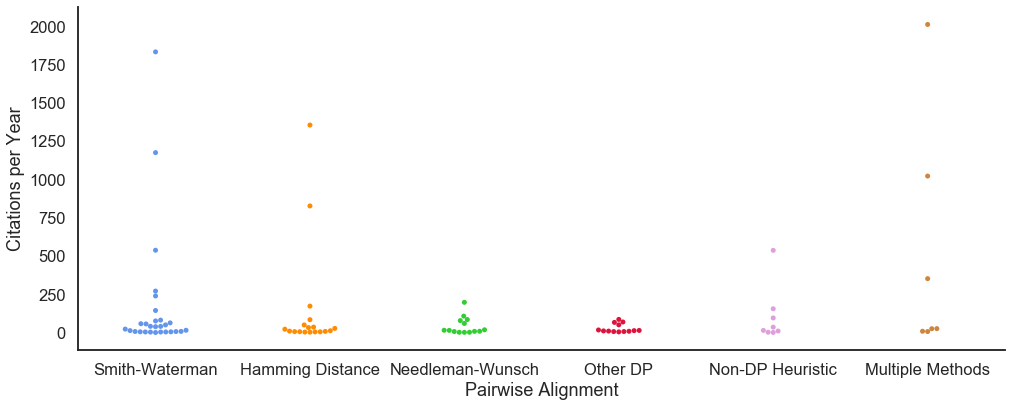

In [36]:
ax = sns.catplot(data=data_cite, x='Pairwise', y='citation_per_year', height=6, aspect=2.4, 
                order=['Smith-Waterman', 'Hamming Distance', 'Needleman-Wunsch', 'Other DP', 'Non-DP Heuristic',
                     'Multiple Methods'],
                palette=clrs, kind='swarm')
ax.set(xlabel = 'Pairwise Alignment', ylabel = 'Citations per Year')
#ax.set_xticklabels(rotation=40, ha="right")
#plt.show()
plt.savefig('../figures/Local_by_Citations.png')
plt.savefig('../figures/Local_by_Citations.pdf')

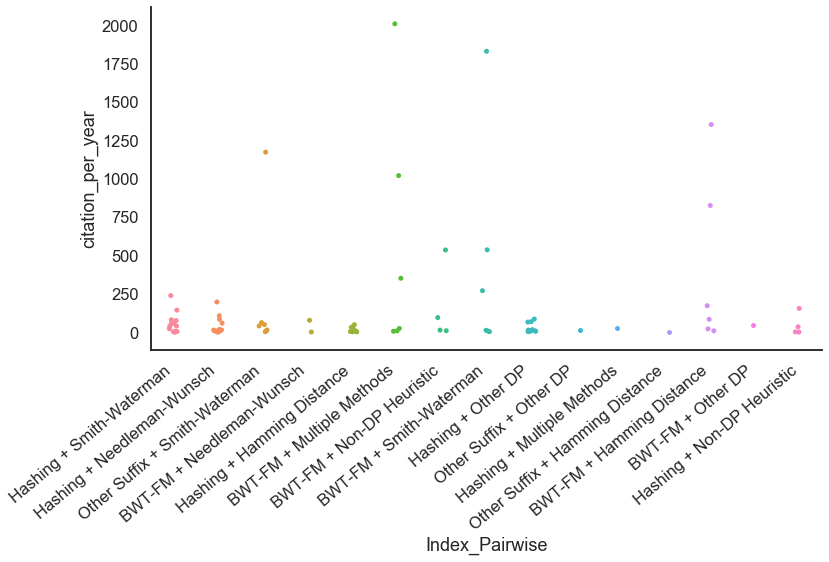

In [37]:
data_cite.loc[:,'Index_Pairwise'] = data_cite.loc[:,'Index'] + " + " + data_cite.loc[:,'Pairwise']

ax = sns.catplot(data=data_cite, x='Index_Pairwise', y='citation_per_year', height=6, aspect=2)
ax.set_xticklabels(rotation=40, ha="right")

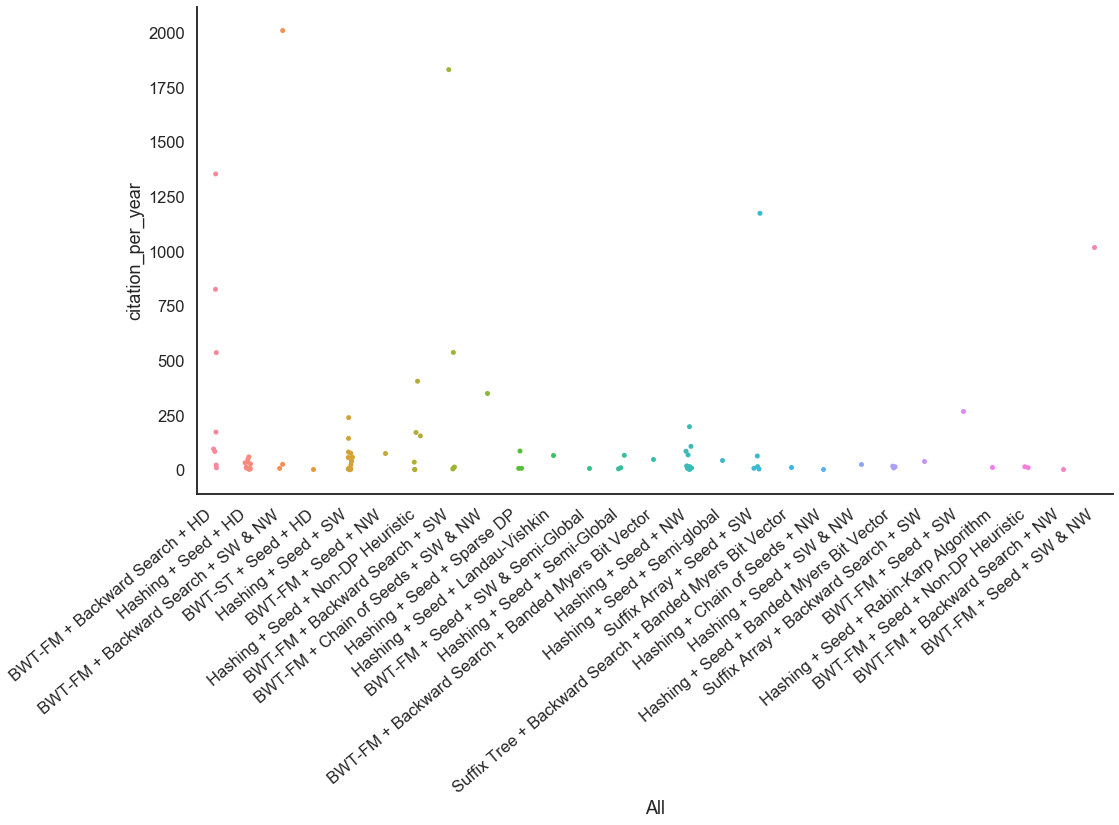

In [38]:
data_cite.loc[:,'All'] = data_cite.loc[:,'Indexing'] + " + " + data_cite.loc[:,'Global_Pairwise']

ax = sns.catplot(data=data_cite, x='All', y='citation_per_year', height=8, aspect=2)
ax.set_xticklabels(rotation=40, ha="right")
plt.show()

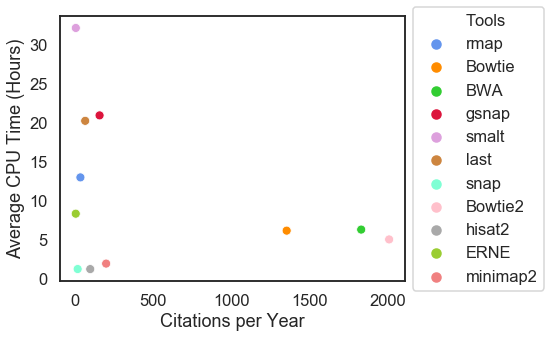

In [57]:
plt.figure(figsize=(8,5))
ax = sns.scatterplot(data = rtcite, x = 'citation_per_year', 
                     y = 'average_runtime', hue='Tools', palette=clrs[0:11], hue_order=order_by_year)
ax.set(xlabel = 'Citations per Year', ylabel = 'Average CPU Time (Hours)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
#plt.show()
plt.tight_layout()
plt.savefig('../figures/Runtime_vs_Citations.png')
plt.savefig('../figures/Runtime_vs_Citations.pdf')

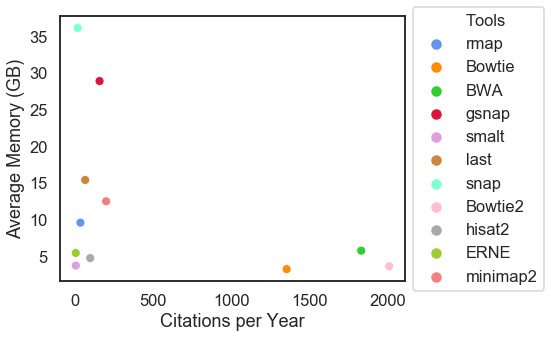

In [60]:
plt.figure(figsize=(8,5))

ax = sns.scatterplot(data = memcite, x = 'citation_per_year', 
                     y = 'average_memory', hue='Tools', palette=clrs[0:11], hue_order=order_by_year)
ax.set(xlabel = 'Citations per Year', ylabel = 'Average Memory (GB)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.tight_layout()
#plt.show()
plt.savefig('../figures/Memory_vs_Citations.png')
plt.savefig('../figures/Memory_vs_Citations.pdf')

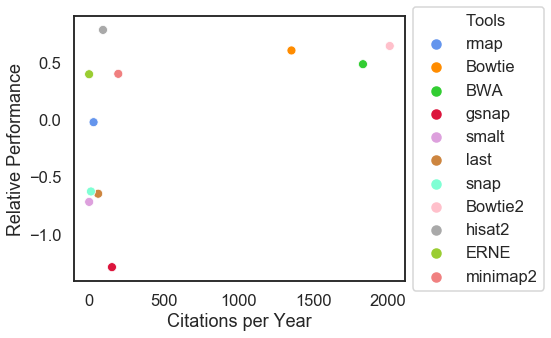

In [59]:
rtvm = pd.merge(rtcite_summ, memcite_summ, 
                on=['Tools','citation_per_year','Application','Index','Pairwise'],
                how='inner')
rtvm.loc[:,'std_rt'] = (rtvm.loc[:,'average_runtime'].mean() - rtvm.loc[:,'average_runtime'])/rtvm.loc[:,'average_runtime'].std()
rtvm.loc[:,'std_mem'] = (rtvm.loc[:,'average_memory'].mean() - rtvm.loc[:,'average_memory'])/rtvm.loc[:,'average_memory'].std()
rtvm.loc[:,'relative_performance'] = (rtvm.loc[:,'std_rt']+rtvm.loc[:,'std_mem'])/2
rtvm
plt.figure(figsize=(8,5))
ax = sns.scatterplot(data = rtvm, x = 'citation_per_year', 
                     y = 'relative_performance', hue='Tools', palette=clrs[0:11], hue_order=order_by_year)
ax.set(xlabel = 'Citations per Year', ylabel = 'Relative Performance')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
#plt.show()
plt.tight_layout()
plt.savefig('../figures/Balance_vs_Citations.png')
plt.savefig('../figures/Balance_vs_Citations.pdf')